In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
len(X_train)


60000

In [4]:
len(X_test)

10000

In [22]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

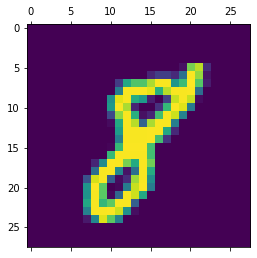

In [6]:
plt.matshow(X_train[17])

In [7]:
y_train[17]

8

In [31]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [32]:
X_train = X_train_flattened / np.max(X_train)
X_test = X_test_flattened / np.max(X_test)

In [33]:
X_train_flattened.shape

(60000, 784)

Model Building

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [35]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9264


[0.26445332169532776, 0.9264000058174133]

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  922,   17,    8,    3,   13,   11,   40,    5],
       [   3,    0,   17,  927,    0,   17,    2,   11,   21,   12],
       [   1,    1,    3,    1,  907,    0,   11,    4,    9,   45],
       [  10,    3,    4,   42,   11,  757,   13,    8,   35,    9],
       [   9,    3,    7,    1,    7,   10,  916,    2,    3,    0],
       [   1,    5,   22,    6,    6,    0,    0,  947,    3,   38],
       [   4,    7,    6,   22,    9,   20,    8,   11,  880,    7],
       [   9,    7,    2,    9,   18,    5,    0,   17,    8,  934]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

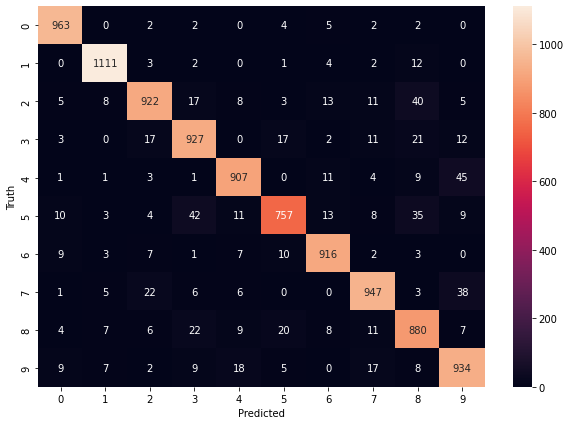

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Another Model with 1 hidden layer

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9837


In [39]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9731


[0.08808725327253342, 0.9731000065803528]

Text(69.0, 0.5, 'Truth')

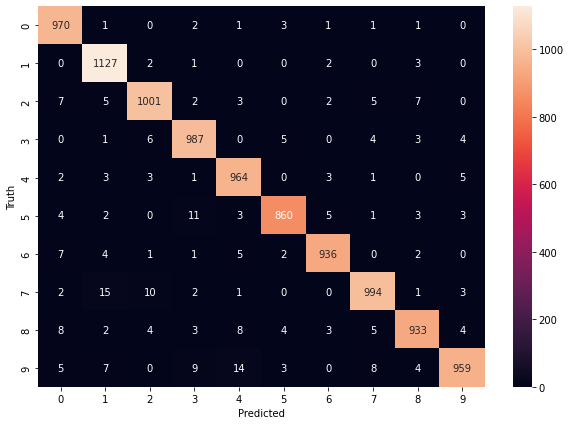

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')